## Part 2: Image Data Visualization

#### 1.- What is an Image?
A Digital image is conformed by pixels(represented by 8 bits), which encompass the width and height of the image in a 2 dimensional array. Additionally, the pixel contains information of the intensity of certain colors. to get that information we use rgb filters which separate colors in red, green and blue, with values ranging from 0 to 255, being the later the brightess one. More shades of color can be obtained through using 16 bits for example, in which case we may get 2^16

Grayscale image in the other side, shows the intensity in certain color(red for example) as luminous white parts in contrast to the grey background produce for a lack of that color in different parts.

Finally the colorful Images is formed by overlapping the grey and rgb images.


####  2.- FITS Files
Astronomical images are typically saved in FITS format(Flexible image transport system), it takes the data produced by telescopic observations and allows to be worked by computer.

It has different Headers, the primary and the complements. the primary gives information of the observation itself, as what telescope was used, object position, etc.

In [3]:
import matplotlib.pyplot as plt # Plot package
from astroquery.skyview import SkyView # Object Search package
"""
Through Skyview page it is possible to search for a query on different objects
in the following example we will be using a M31 query
However, to obtain the data we will be using a python code
"""

'\nThrough Skyview page it is possible to search for a query on different objects\nin the following example we will be using a M31 query\nHowever, to obtain the data we will be using a python code\n'

In [4]:
# we can ask SkyView for a lot of things
SkyView.get_images("M31", "SDSSg") # we are asking for object and survey
# we are observing the primary header

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x72c6d1aee190>]]

In [5]:
# we can access to the inner data with index 0 
hdu = SkyView.get_images("M31", "SDSSg")[0][0]

In [6]:
hdu.header # gives information of the data obtained

SIMPLE  =                    T / Written by SkyView Sun Jun 30 14:53:22 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [7]:
# from the header we know that there is an image
M31_pixels = hdu.data # gives pixel information in float format
# this is an array
type(M31_pixels)

numpy.ndarray

In [8]:
# Check size of the image
M31_pixels.shape # the image has 300 pixels width and length

(300, 300)

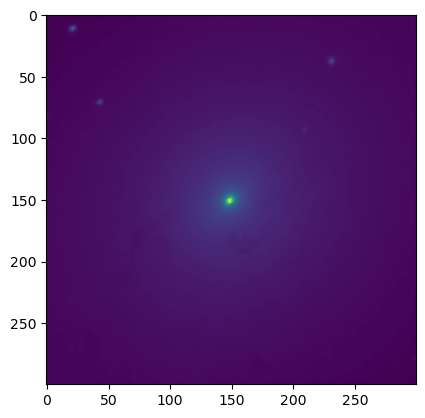

In [9]:
# we can plot simply by using the plt.imshow on the pixel info
plt.imshow(M31_pixels)

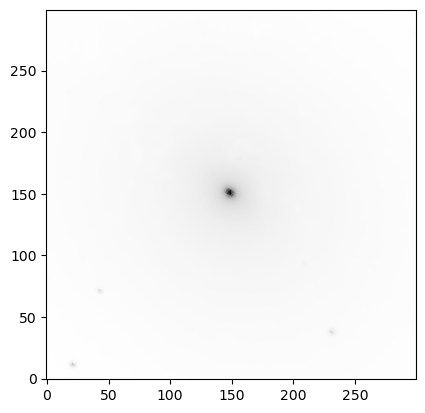

In [10]:
# Note we can change the color of the plt
# and put the 0,0 in the corner left as it should be
plt.imshow(M31_pixels, cmap ='Greys', origin='lower')

In [11]:
# Fetching data with specific parameters
# previously we observe the core of M13, now the overall galaxy
# we specify that we want an image of 600 x 600 and a radius in arcmin
import astropy.units as u # this will help to change units
hdu = SkyView.get_images("M31", "DSS2 Blue", pixels=600, radius=150*u.arcmin)[0][0]

In [12]:
M31_DSS2_Blue_Pixels = hdu.data # we send the pixel data to a variable

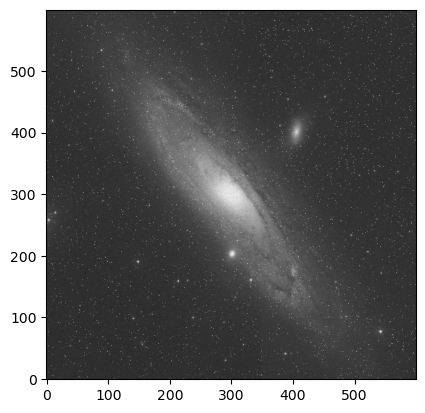

In [13]:
plt.imshow(M31_DSS2_Blue_Pixels, cmap='gray', origin='lower')
# we change map color and put the origin in the bottom left corner

### Fits file creation

In [14]:
"""
FITS file creation, as we do not have a telescope to observe, we will use the M13 data

STEPS:
1) HDUList() creation to store headers + Data units
    from astropy.io import fits
    hdulist = fits.HDUList()
2) Primary HDU creation
    hdu1 = fits.PrimaryHDU()
3) Add Pixels data
    hdu1.data = M31_Pixels
4) Add Meta data(data of the file itself)
    hdu1.header = M31_header
5) Append Primary HDU to the HDU list
    hdulist.append(hdu1)
"""


'\nFITS file creation, as we do not have a telescope to observe, we will use the M13 data\n\nSTEPS:\n1) HDUList() creation to store headers + Data units\n    from astropy.io import fits\n    hdulist = fits.HDUList()\n2) Primary HDU creation\n    hdu1 = fits.PrimaryHDU()\n3) Add Pixels data\n    hdu1.data = M31_Pixels\n4) Add Meta data(data of the file itself)\n    hdu1.header = M31_header\n5) Append Primary HDU to the HDU list\n    hdulist.append(hdu1)\n'

In [15]:
M31_header = hdu.header # this is the meta data
# the header are the variables names with their respective values

In [16]:
M31_Pixels = hdu.data # this is the data contained in the hdu

In [17]:
from astropy.io import fits
hdulist = fits.HDUList() # store HDU in a blank list
hdu1 = fits.PrimaryHDU() # empty list creation

In [18]:
hdu1.data # we notice this is empty as we wanted

In [19]:
hdu1.header # the header is also empty as we expect

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [20]:
# The primary HDU its empty, we add the M31 data to it
hdu1.data = M31_Pixels # adding pixel data to the primary hdu
hdu1.header = M31_header # adding header information 

In [21]:
hdu1.data # now, it contains information of the pixels

array([[8711. , 8977. , 8339. , ..., 8992.5, 8645.5, 9002.5],
       [8598. , 9339. , 8877. , ..., 8767.5, 8383.5, 8589.5],
       [8548. , 8152. , 8364. , ..., 8591.5, 8301.5, 8957.5],
       ...,
       [9754. , 9167. , 9323. , ..., 9249.5, 9680.5, 8668.5],
       [9123. , 9285. , 9379. , ..., 8836.5, 8705.5, 9914.5],
       [9535. , 9423. , 9454. , ..., 9005.5, 9268.5, 9071.5]],
      dtype=float32)

In [22]:
# Now, The created primary HDU has to be added to the HDU List
hdulist.append(hdu1)

In [23]:
# Finally, to generate the fits file we storage the data in a variable
hdulist.writeto('Dummy_FITS_File.fits')

OSError: File Dummy_FITS_File.fits already exists. If you mean to replace it then use the argument "overwrite=True".

In [24]:
# Now if we want to open the FITS file we need the path of said file
from pathlib import Path
print(Path.cwd())

/home/fabian/Curso_udemy_Astro


In [25]:
# Open FITS data 
My_fits = fits.open('/home/fabian/Curso_udemy_Astro/Dummy_FITS_File.fits')

In [26]:
# Cheking info
My_fits # we have a primary HDU as we expected

In [27]:
My_fits[0].header # Here we obtain the primary header

SIMPLE  =                    T / Written by SkyView Mon Jun 24 10:17:46 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =              10.6848 / Reference longitude                            
CRVAL2  =              41.2691 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [28]:
My_fits[0].data # The pixel data 

array([[ 8936. ,  8477. ,  8939. , ...,  8614.5,  8567.5,  9186.5],
       [ 8998. ,  8564. ,  8627. , ...,  8701.5,  8448.5,  9111.5],
       [ 9048. ,  8452. ,  8764. , ...,  8813.5,  9123.5,  8729.5],
       ...,
       [ 9554. ,  9210. ,  9104. , ...,  8871.5, 10202.5,  8290.5],
       [ 9523. ,  9385. ,  9179. , ...,  8758.5,  9152.5,  9836.5],
       [ 9685. ,  8773. ,  9254. , ...,  8552.5,  8890.5,  8693.5]],
      dtype=float32)

In [29]:
dummy_data_var = My_fits[0].data # sending data to a variable

In [30]:
dummy_data_var.shape # it is a 600x600 pixel image

(600, 600)

### Pixel Distribution
- Statistic Checking
- Histogram Creation

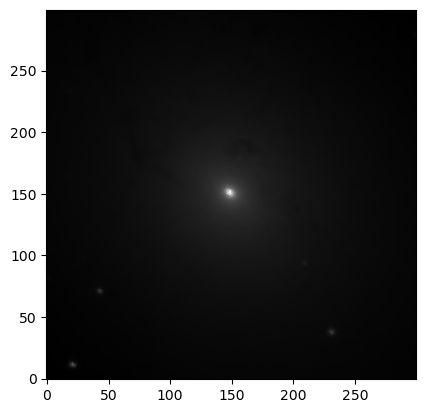

In [31]:
#M31_pixels contains the information for every pixel in the image
plt.imshow(M31_pixels, cmap='gray', origin='lower')

In [32]:
# statistic Checking
import numpy as np
print('-----Statistics-----')
print(f'Minimun Value:- {np.min(M31_pixels)}')
print(f'Maximum Value:- {np.max(M31_pixels)}')
print(f'Mean Value:- {np.mean(M31_pixels)}')
print(f'Standard Deviation Value:- {np.std(M31_pixels)}')
# the center of the object has a reference pixel value given in the header
# CRPIX1 Y CRPIX2, it values are 150.5, we expect the maximum value to be there

-----Statistics-----
Minimun Value:- 5.359375
Maximum Value:- 178.0
Mean Value:- 13.329444885253906
Standard Deviation Value:- 6.3922271728515625


In [33]:
# Pixel value at the center of Andromeda Galaxy
print(M31_pixels[150,150])
print(M31_pixels[151,151])
# as the maximum value is 178, this means that we have some noise affecting the pixels

148.5
126.5


(array([3.0250e+03, 1.0787e+04, 2.0618e+04, 1.6363e+04, 1.1202e+04,
        7.4240e+03, 5.4950e+03, 3.8600e+03, 2.7730e+03, 2.0410e+03,
        1.6910e+03, 1.1580e+03, 8.8600e+02, 6.2700e+02, 4.5800e+02,
        3.5800e+02, 2.6800e+02, 1.9400e+02, 1.6700e+02, 1.1500e+02,
        8.5000e+01, 6.3000e+01, 5.5000e+01, 3.6000e+01, 3.4000e+01,
        2.2000e+01, 1.8000e+01, 2.0000e+01, 1.8000e+01, 7.0000e+00,
        1.6000e+01, 7.0000e+00, 1.0000e+01, 5.0000e+00, 7.0000e+00,
        7.0000e+00, 4.0000e+00, 5.0000e+00, 7.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

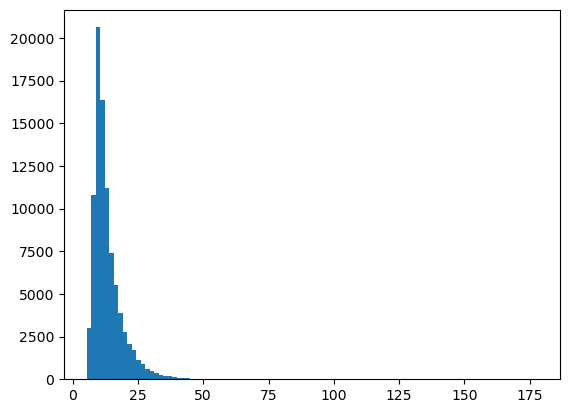

In [34]:
# Let us visualize the distribution of the histogram
# with flat we go from 2d to 1d to speed the output
# with bins 300, we force the histogram to have 50 'bars', more bin, better fitted distribution
plt.hist(M31_pixels.flat, bins=100)
# The Y-axis shows the number of times 
# that the values occurred within the intervals set by the X-axis.

### Pixel Scaling
- Linear Scaling (Intensity Normalization)
For this, we take the whole array of pixels(x) and substract it with min value present in the array (xmin). Then, we divide it with the range of x values, that is the max value minus the min value (x_max - x_min)

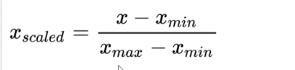

The output values will be scaled down in a range between [0,1]

Note that we can choose an interval [a,b] and apply the scaling in that specific zone 

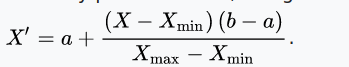


In [35]:
# to do the scaling we write numerator and denominator separatelly in the function
def minmax_scaling(pixel_array): # as an argument we only take the total pixel array
    num = pixel_array - np.min(pixel_array) 
    den = np.max(pixel_array - np.min(pixel_array))
    return num/den

In [36]:
# Normalize the M31 data and visualize it 
print(minmax_scaling(M31_pixels)) # we apply the function for scaling
minmax_array = minmax_scaling(M31_pixels) # append array to a variable

[[0.00049778 0.00054304 0.00049778 ... 0.01217305 0.01248982 0.01190153]
 [0.00045253 0.00054304 0.00036202 ... 0.01312336 0.01208254 0.01208254]
 [0.00067879 0.         0.00058829 ... 0.01203729 0.01276134 0.0122183 ]
 ...
 [0.01181102 0.01181102 0.01267083 ... 0.00099557 0.00181012 0.0023079 ]
 [0.0122183  0.01307811 0.01289709 ... 0.00176487 0.00181012 0.00117658]
 [0.01258032 0.01244457 0.01289709 ... 0.00099557 0.00135759 0.00113132]]


In [37]:
# we create a function to plot the scaling down pixels
# this is usefull, as we dont have to write everything everytime 
def plot_pixel(pixel_array, title, color): # arguments take title, color and intensity array
    plt.imshow(pixel_array, cmap='gray', origin = 'lower') 
    plt.title(title, color = color, weight ='bold')# change color to title
    plt.axis('off') 

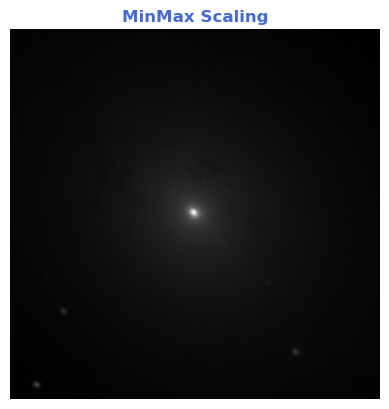

In [38]:
# this will give the image with the applied normalization
plot_pixel(minmax_array, title = 'MinMax Scaling', color = 'royalblue')

In [39]:
# Function to compare original data pixel plot, and the normalized one
def compare_pixels(original_array, scaled_array):
    plt.subplot(1,2,1) # first subplot
    plot_pixel(original_array, title='Original Image', color='black')
    plt.subplot(1,2,2) # second subplot
    plot_pixel(scaled_array, title='MinMax Scaled Image', color='royalblue')
# note that color only applies to the title

In this case we did not obtain new information through the scalation


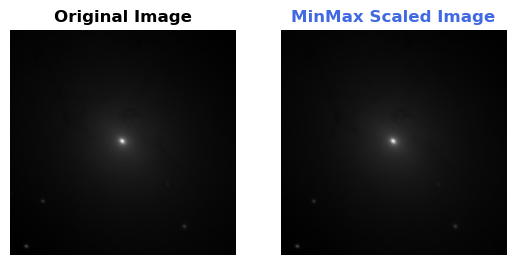

In [40]:
compare_pixels(M31_pixels, minmax_array)
print('In this case we did not obtain new information through the scalation')

### Other Pixel Scaling Methods
- Standar Scaling(Z scaling)
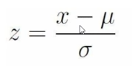
we substract the array with the mean value and divide by the standrd deviation. work well for gaussian(normal) distributions. that is, when the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. 
<br>

- Log Normalization

Useful for data that spans several orders of magnitude. Mitigates the impact of outliers and compresses the range of values.

- Square Root Normalization
- Visualize Pixel Distribution in the best output possible

In [41]:
# Standar Scaling/ Gauss Distribution
import numpy as np
def zscale(pixel_array):
    mean = np.mean(pixel_array)
    std = np.std(pixel_array)
    num = pixel_array-mean
    return num/std

In [42]:
zscale_array = zscale(M31_pixels)
def compare_pixels2(original_array, zscaled):
    plt.subplot(1,2,1) # first subplot
    plot_pixel(original_array, title='Original Image', color='black')
    plt.subplot(1,2,2) # second subplot
    plot_pixel(zscaled, title='ZScaled Image', color='royalblue')


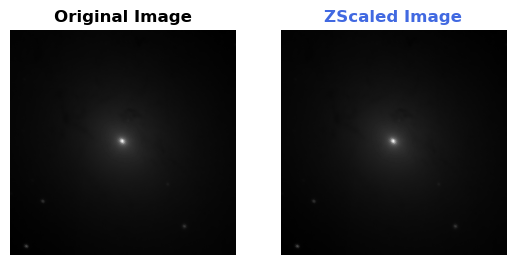

In [43]:
compare_pixels2(M31_pixels, zscale_array)
# Again with this we dont see that much difference, due to the data nature

In [44]:
# Log Normalization, this takes the logarithm of the input array
def lognormal(pixel_array):
    return np.log(pixel_array)

In [45]:
log_norm_array = lognormal(M31_pixels)
def compare_pixelslog(original_array, logscaled):
    plt.subplot(1,2,1) # first subplot
    plot_pixel(original_array, title='Original Image', color='black')
    plt.subplot(1,2,2) # second subplot
    plot_pixel(logscaled, title='Log Scaled Image', color='royalblue')
# log compresses the range of values as it minimize the variance between data

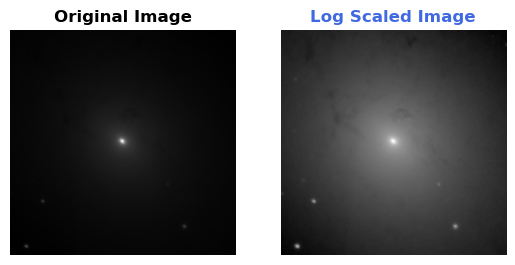

In [46]:
compare_pixelslog(M31_pixels, log_norm_array)
# now we see more difference!

### Histogram creation of the best output

(array([2.400e+01, 6.700e+01, 2.440e+02, 2.590e+02, 3.570e+02, 5.200e+02,
        7.890e+02, 7.970e+02, 8.540e+02, 1.260e+03, 1.448e+03, 1.799e+03,
        2.109e+03, 2.790e+03, 3.237e+03, 3.406e+03, 4.561e+03, 4.480e+03,
        4.258e+03, 4.118e+03, 4.067e+03, 3.780e+03, 3.467e+03, 3.483e+03,
        3.255e+03, 2.688e+03, 2.849e+03, 2.545e+03, 2.467e+03, 2.096e+03,
        1.986e+03, 1.922e+03, 1.693e+03, 1.713e+03, 1.495e+03, 1.380e+03,
        1.247e+03, 1.193e+03, 1.018e+03, 9.510e+02, 8.520e+02, 8.290e+02,
        7.700e+02, 6.460e+02, 5.720e+02, 5.200e+02, 4.620e+02, 3.760e+02,
        3.400e+02, 2.860e+02, 2.420e+02, 2.250e+02, 1.880e+02, 1.630e+02,
        1.300e+02, 1.180e+02, 9.000e+01, 8.200e+01, 5.700e+01, 5.500e+01,
        4.100e+01, 4.300e+01, 2.500e+01, 2.300e+01, 1.700e+01, 2.200e+01,
        1.800e+01, 1.400e+01, 1.200e+01, 1.100e+01, 7.000e+00, 7.000e+00,
        9.000e+00, 7.000e+00, 5.000e+00, 3.000e+00, 7.000e+00, 8.000e+00,
        3.000e+00, 3.000e+00, 3.000e+0

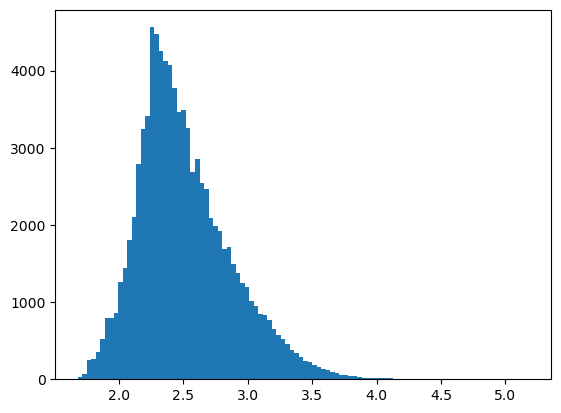

In [47]:
# .flat to make it 1d
plt.hist(log_norm_array.flat, bins = 100)
# we can see the data spread is higher than the original image

In [48]:
# the shape of the array should be the same
log_norm_array.shape

(300, 300)

In [49]:
# One last normalization is the square root
def sqrt_scale(pixel_array):
    return np.sqrt(pixel_array)

In [50]:
sqrt_array = sqrt_scale(M31_pixels)
def compare_pixel_sqrt(original_array, sqrt_scaled_array):
    plt.subplot(1,2,1) # first subplot
    plot_pixel(original_array, title='Original Image', color='black')
    plt.subplot(1,2,2) # second subplot
    plot_pixel(sqrt_scaled_array, title='Sqrt Scaled Image', color='royalblue')

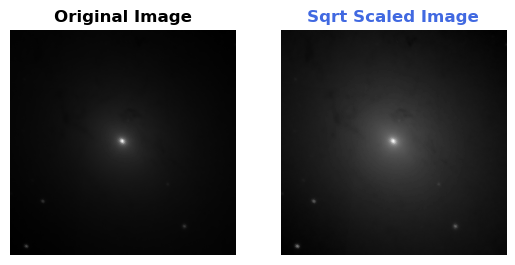

In [51]:
compare_pixel_sqrt(M31_pixels, sqrt_array)

### Zscale Interval Astropy
- Use Logscaled image 


#### Create a demo interval
[1,2,3,4,5,6,7,8,9]. let us consider a min and max value of (3,8). what zscale does is take any input lesser than 3 and makes it a 3. aswell as any value higher than 8 becomes an 8. Therefore for our interval we get:
[3,3,3,4,5,6,7,8,8]

In [52]:
from astropy.visualization import ZScaleInterval
z = ZScaleInterval() # we create a z object to search for limits in an image

In [53]:
# output are 2 values, we send info to min and max variable. 
min, max = z.get_limits(log_norm_array) # this takes the array with wanted min and max

In [54]:
# min max checking
print(f'Minimun = {min}')
print(f'Maximun = {max}')
print(' ')
print('Comparing results with py min and max')
print(' ')
print(f'Minimun = {np.min(log_norm_array)}')
print(f'max = {np.max(log_norm_array)}')

Minimun = 1.6889997720718384
Maximun = 4.447910199027211
 
Comparing results with py min and max
 
Minimun = 1.678847312927246
max = 5.181783676147461


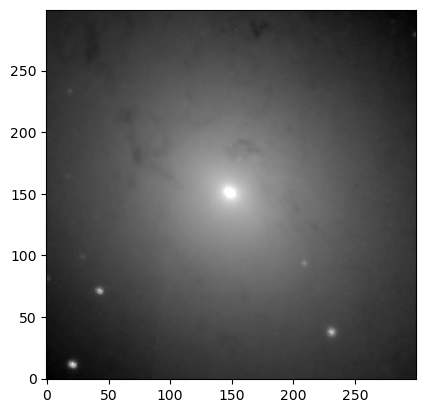

In [55]:
# any value in the array lesser or higher than the min and max respectively will be set to limit value
# Plot M31 data using Interval with colorband range vmin and vmax
plt.imshow(log_norm_array, vmin=min, vmax=max, cmap='gray',origin='lower')
# the image is more highlited
# note that this is an matplotlib image

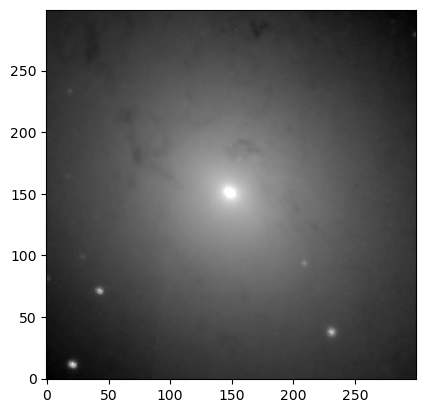

In [56]:
# lets save the image in a variable
img = plt.imshow(log_norm_array, vmin=min, vmax=max, cmap='gray',origin='lower')
# this takes a renderer and gives array of the pixel in bit form
image_array = img.make_image(renderer=None)[0] # 0 gives the array part 

In [57]:
image_array.shape # original image was a 300x300 image so we have to obtain the original shape

(370, 496, 4)

In [58]:
# we use unsampled = True to obtain the correct shape
image_array = img.make_image(renderer=None, unsampled=True)[0] # 0 gives the array part 
print(image_array.shape)
# 4th channel means that we have red,green,blue, alpha, alpha related to the intensity(opacity)

(300, 300, 4)


In [59]:
# Convert 4th channel image to grayscale image
import cv2
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY ) 
# it takes array , and the 4th channel goes from bgr to grayscal

Text(0.5, 1.0, 'ZscaleInterval Grayscale')

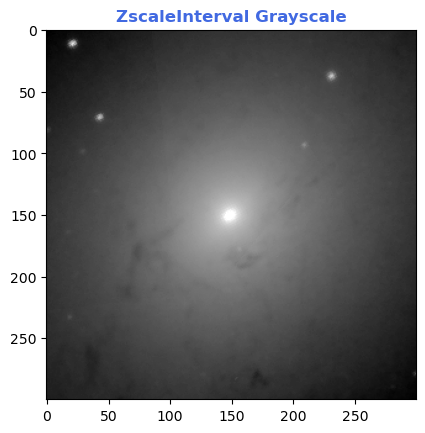

In [60]:
plt.imshow(gray_array, cmap='grey')
plt.title('ZscaleInterval Grayscale', color='royalblue',weight='bold')
# note that output is the same, however we dont have 4 channels anymore, just 1

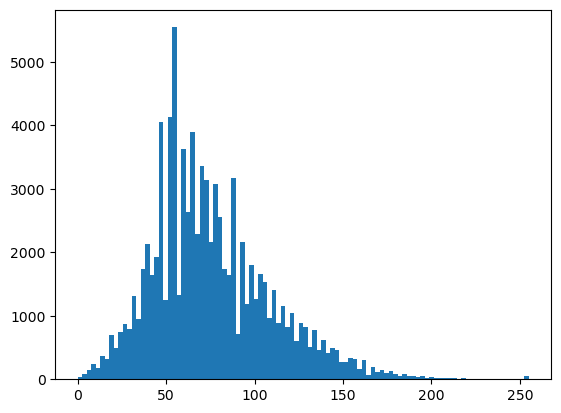

In [61]:
# Histogram visualization
plt.hist(gray_array.flat, bins = 100) 
plt.show() # this shows just the image, not the array output
# we convert float image into 8 bit image, values are from 0 to 255 as expected

In [62]:
# For image processing is necesary to convert gray array in a new variable
grayscale_zint_array = gray_array # we send array to a variable

## Module 4: Image Processing, Filters and Features
### - Convolution Operation
Understanding general concepts

### - Gaussian Denoising with Gaussian kernel
This allows to remove some of the data noise

### - Meijering and Sato Filter Implementation
Usefull to enhance features in the image

### - Corner Foerstner and Multiscale Basic Feature Extraction
Allows to extract features to know how techniques are working

Denoising using Gaussian requires to blurr the image by removeing noises, this process is known as Gaussian Smoothing. It works through the convolution operation. 

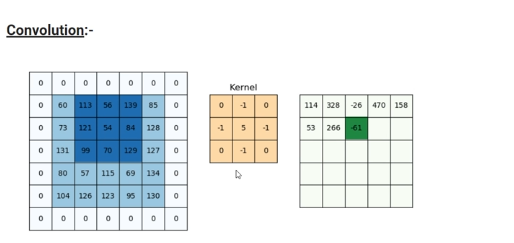

Process takes the array of pixels that forms an image with zeros added as a contour and passes it through the kernel, which acts as a filter. in the image, the light blue square is the original image, The convolution acts as follows:

- 1) the dark blue square matrix is multiplied by the kernel matrix values. Then the sum of the components is saved on a new matrix, which values are seen in the rigth matrix.

- 2) that process is repeated for every 3x3 square than can be formed in the original image considering the zero contour until the final matrix has all it values.

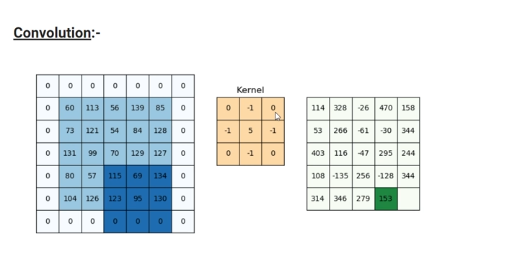

- 3) As an example we can consider the first value obtained, this is achieved by multiplying the dark blue square values with it corresponding kernel number. then the sum of all that components will be saved on the green square in the new matrix. [0*0 + 0*-1 + 0*0 + 0*-1 + 60*5 + 113*-1 + 0*0 + 73*-1 + 121*0] = 114. which is precisely the number we get in the rigth matrix, with that we have 1 convolution, then the process is repeated.

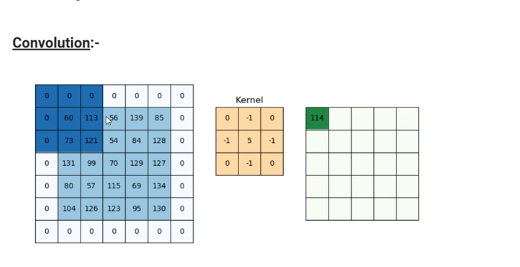

- 4) the zeros added on the original image are nedeed, as this process decreases the matrix size, the way to prevent this is adding a 0 layer padding. 



In [63]:
# Gaussian Denoising, we need convolution 2D filter from signal module
from scipy.signal import convolve2d

In [64]:
# Generate filter
np.ones((5,5)) # this is an array of 5x5 full of ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [65]:
kernel = np.ones((3,3))/9 # simple 3x3 kernel
# note we can change what is inside by dividing, the sum inside is 1
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [66]:
# Now we create a gaussian Kernel
# gaussian curve has higher values in the center that in the edges
gaussian_kernel = np.array(([1/16,1/8,1/16],
                             [1/8,1/4,1/8],
                             [1/16,1/8,1/16]))
gaussian_kernel # we created a matrix

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [67]:
# We can check that the sum inside the matrix is 1 through
a = sum(gaussian_kernel)[0] # this takes the first row
b = sum(gaussian_kernel)[1] # second row sum
c = sum(gaussian_kernel)[2] # third row sum
print(a+b+c)

1.0


In [68]:
# Doing Convolution using kernel(Scipy package)
# arguments are the array pixels, the previously created kernel
# mode same indicates that the output matrix should be of the same size as input
convolved_image = convolve2d(M31_pixels, kernel, mode='same')

In [69]:
# Convolution with the gaussian kernel
gaussian_convolved_image = convolve2d(M31_pixels, gaussian_kernel, mode='same')

(-0.5, 299.5, -0.5, 299.5)

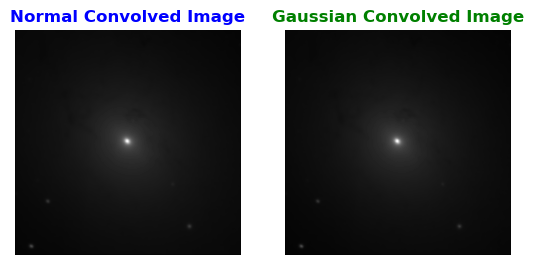

In [70]:
# Now lets see the results
plt.subplot(1,2,1) # first subplot

plt.imshow(convolved_image, cmap='gray', origin = 'lower') 
plt.title('Normal Convolved Image', color = 'blue', weight ='bold')# change color to title
plt.axis('off') 

plt.subplot(1,2,2) # second subplot

plt.imshow(gaussian_convolved_image, cmap='gray', origin = 'lower') 
plt.title('Gaussian Convolved Image', color = 'green', weight ='bold')# change color to title
plt.axis('off') 


# We do not see much difference

In [71]:
# Using grayscale of M31 data to convolve with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode = 'same')

(-0.5, 299.5, -0.5, 299.5)

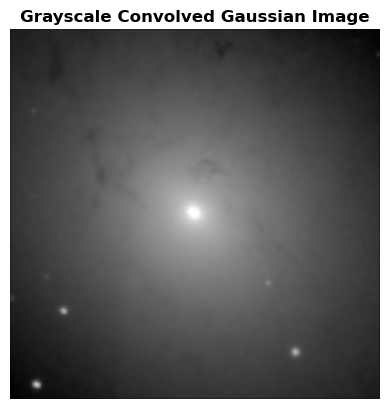

In [72]:
plt.imshow(convolved_grayscale, cmap='gray', origin='lower')
plt.title('Grayscale Convolved Gaussian Image',weight='bold')
plt.axis('off')
# this looks better!

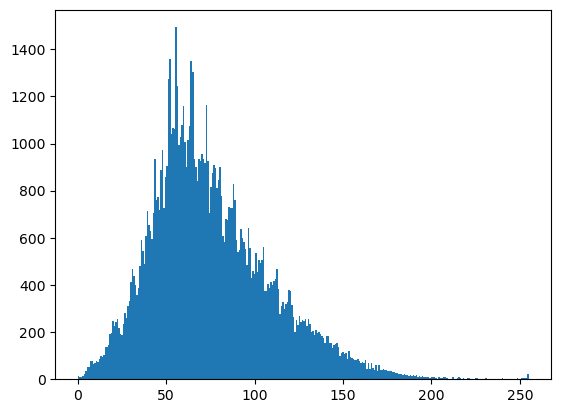

In [73]:
# Create Histogram
plt.hist(convolved_grayscale.flat, bins=300)
plt.show()
# note that we fill de gasps that were in our previous histogram
# with that we eliminate noise in our image

### Enhanching the Features
* Meijering FIlter 
* Sato Filter


In [75]:
# We will use the convolved grayscale image
# Create Spectral list 
SPECTRAL_LIST = ['gray', 'jet', 'hot', 'prism', 'nipy_spectral'] # color maps to see output

In [74]:
# Filter importing 
from skimage.filters import meijering, sato

In [76]:
# Implementing Filters on image
meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)
# this gives array with filter applied 

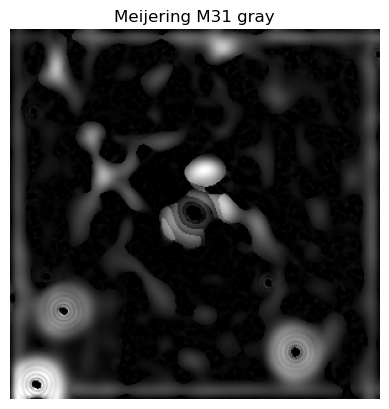

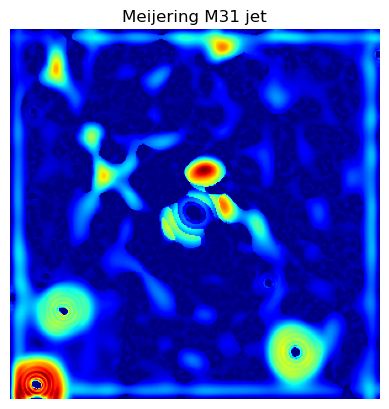

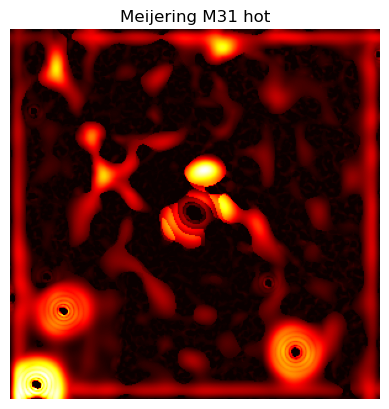

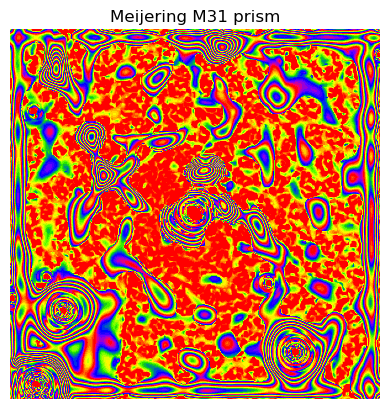

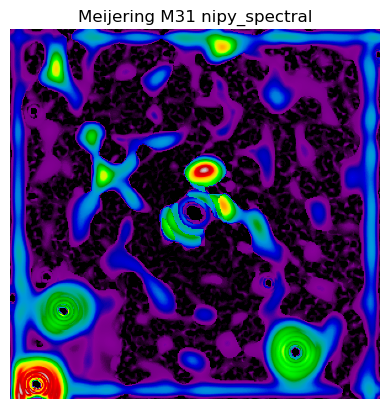

In [78]:
# For each element of spectral list visualize output for each filter
for colormap in SPECTRAL_LIST:
    plt.imshow(meijering_output, cmap=colormap, origin='lower')
    plt.title(f'Meijering M31 {colormap}')
    plt.axis('off')
    plt.show()
# scroll down to see image in different filters

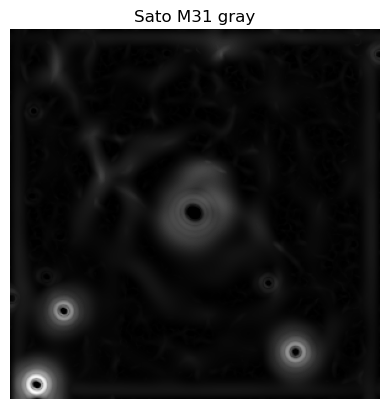

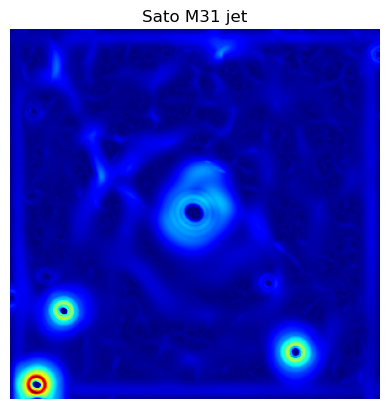

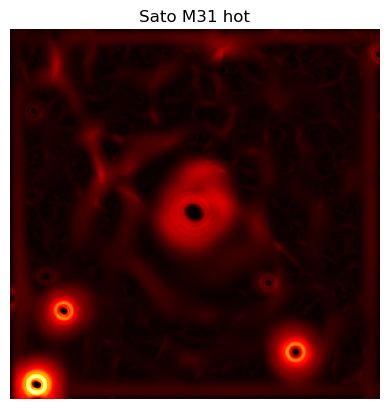

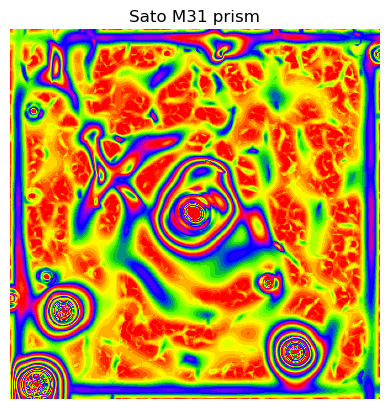

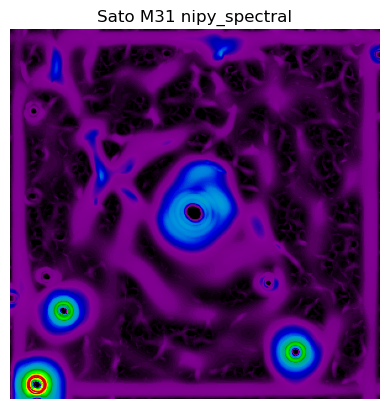

In [80]:
for colormap in SPECTRAL_LIST:
    plt.imshow(sato_output, cmap=colormap, origin='lower')
    plt.title(f'Sato M31 {colormap}')
    plt.axis('off')
    plt.show()

## Coerner Foerstner
* Is an Skimage Feature
* Used for Feature detection and extraction, e,g. texture analysis corners, etc
* Precise location of points, corners and centres of circular features

In [81]:
# Import module
from skimage.feature import corner_foerstner
# takes an image and a standard deviation value used for gaussian kernel(sigma)
# sigma is used as weighting function 
# output gives error ellipse sizes and roundness of error ellipse

In [83]:
# this outputs 2 tuple with values, we separate them with [0] and [1]
feature_output = corner_foerstner(convolved_grayscale) 
feature_output[0] # error image
feature_output[1] # error ellipse roundness of image

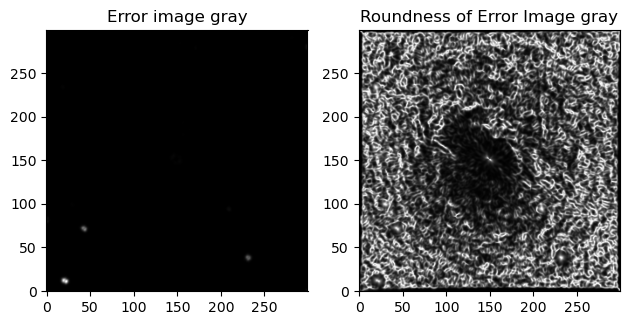

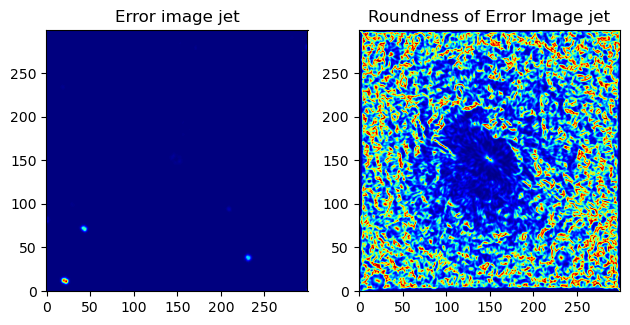

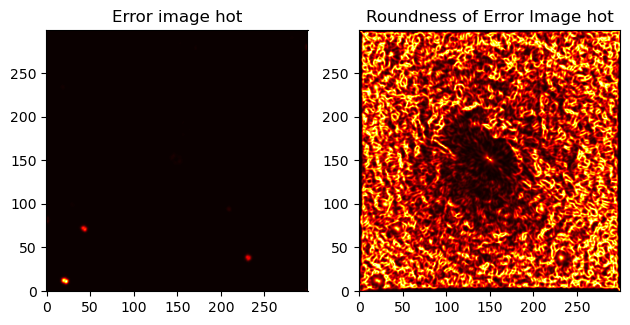

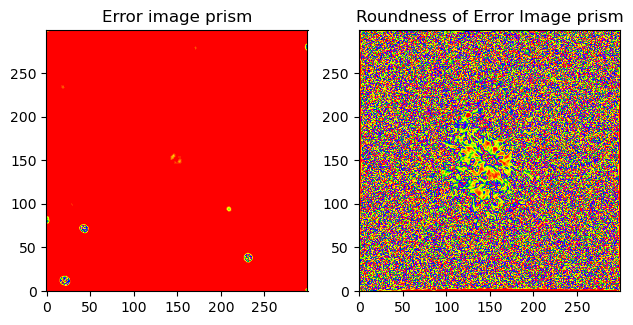

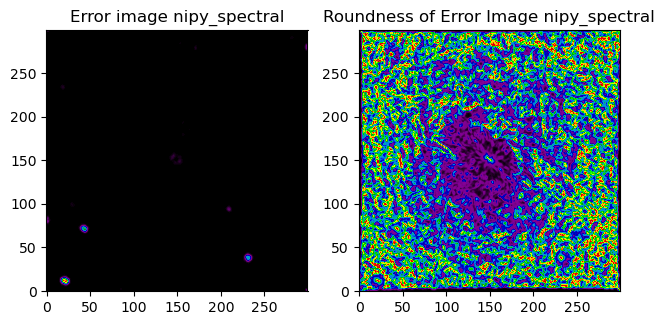

In [85]:
for colormap in SPECTRAL_LIST:
    plt.subplot(1,2,1)
    plt.imshow(feature_output[0], cmap=colormap, origin='lower')
    plt.title(f'Error image {colormap}')
    
    plt.subplot(1,2,2)
    plt.imshow(feature_output[1], cmap=colormap, origin='lower')
    plt.title(f'Roundness of Error Image {colormap}')
    
    plt.tight_layout()
    plt.show()

## Multiscale Basic Features
* Skimage Feature
* Multichannel Outputs
* Otain local features for an image
* Intensity, gradient intensity ussing gaussian blurring

In [86]:
from skimage.feature import multiscale_basic_features

In [87]:
featured_image = multiscale_basic_features(convolved_grayscale)
# this output is an array with shape (300,300,24)
# 300x300 array image with 24 local features(channels)

In [88]:
# Store each channel separately
len(cv2.split(featured_image))
# split allows to obtain 24 channels. can be separated by p1,p2,p3, etc

24

In [91]:
Pixels = cv2.split(featured_image)
# You can now access each split image using index
# i is the index and image the content in said index
# enumarate gives tuple with the 2 values
for i, image in enumerate(Pixels): # 
    print(f"Image {i+1}: {image.shape}")

Image 1: (300, 300)
Image 2: (300, 300)
Image 3: (300, 300)
Image 4: (300, 300)
Image 5: (300, 300)
Image 6: (300, 300)
Image 7: (300, 300)
Image 8: (300, 300)
Image 9: (300, 300)
Image 10: (300, 300)
Image 11: (300, 300)
Image 12: (300, 300)
Image 13: (300, 300)
Image 14: (300, 300)
Image 15: (300, 300)
Image 16: (300, 300)
Image 17: (300, 300)
Image 18: (300, 300)
Image 19: (300, 300)
Image 20: (300, 300)
Image 21: (300, 300)
Image 22: (300, 300)
Image 23: (300, 300)
Image 24: (300, 300)


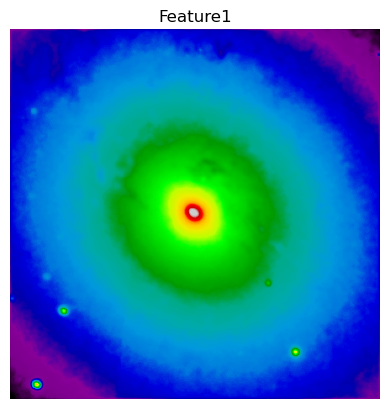

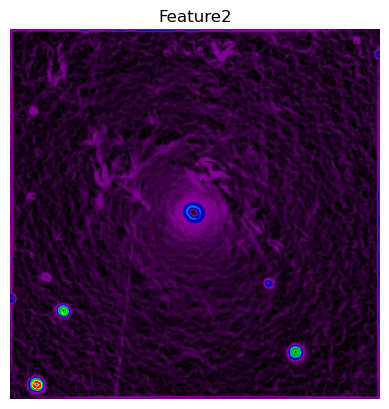

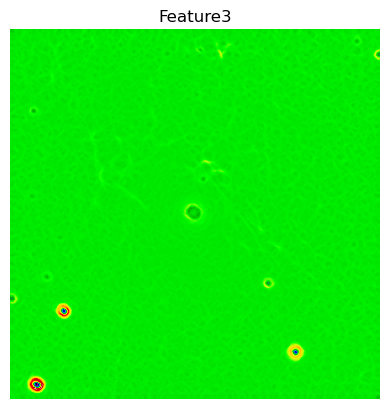

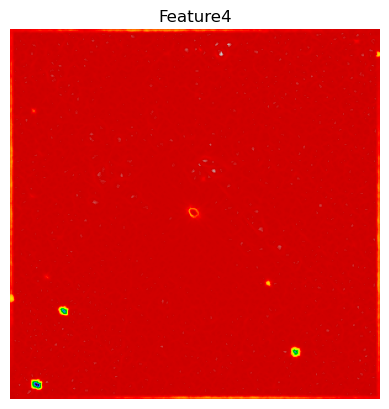

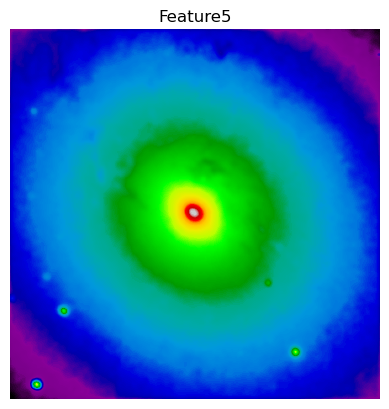

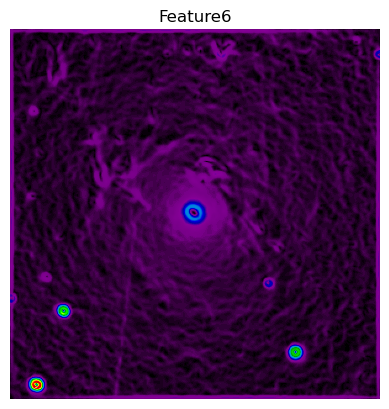

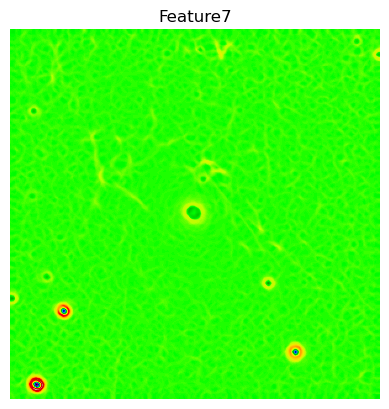

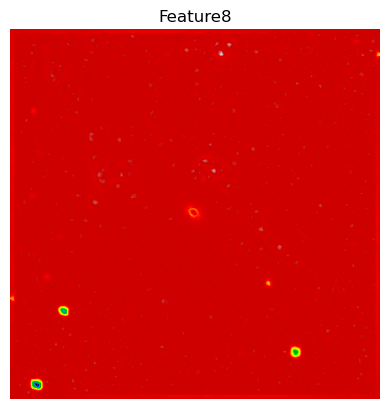

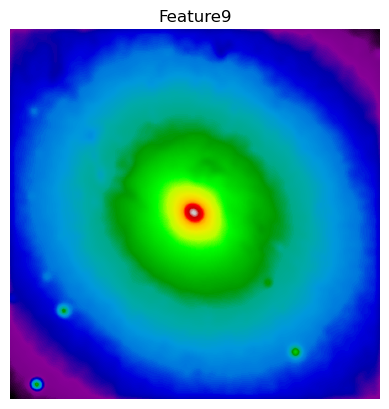

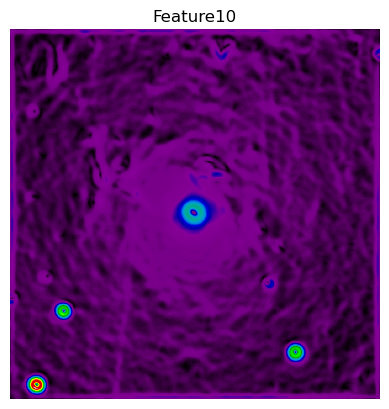

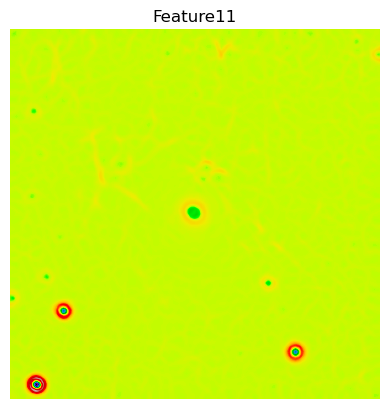

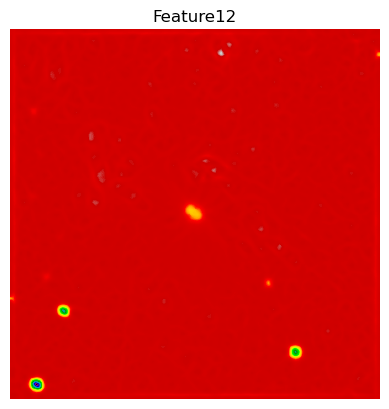

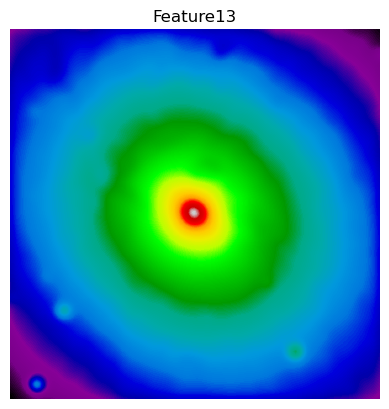

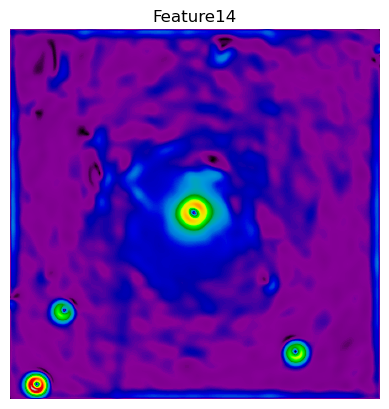

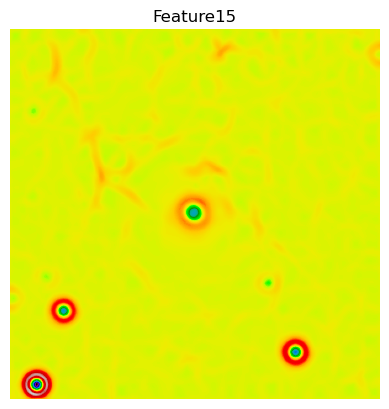

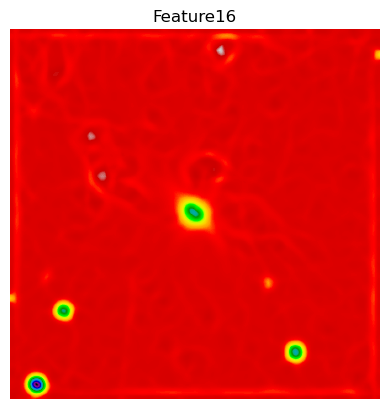

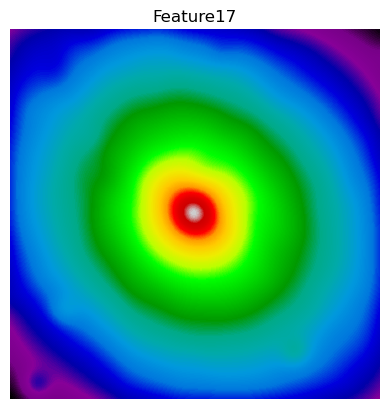

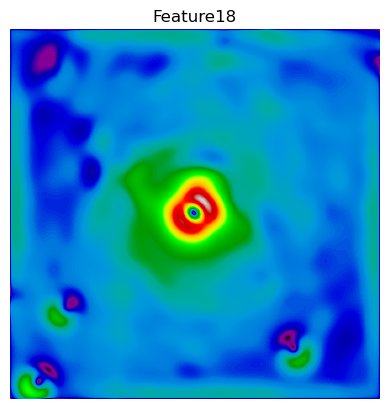

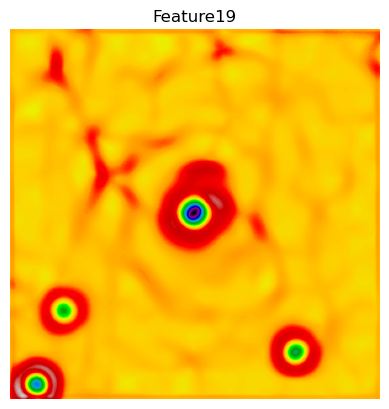

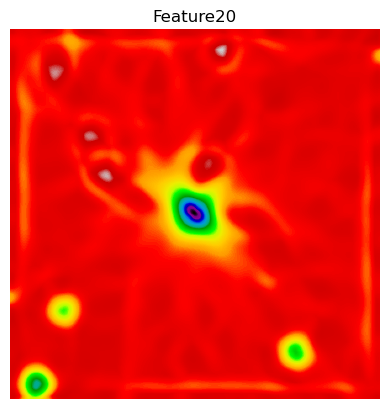

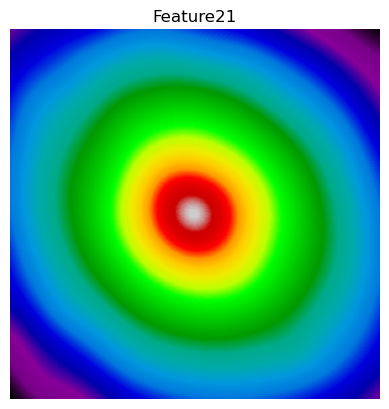

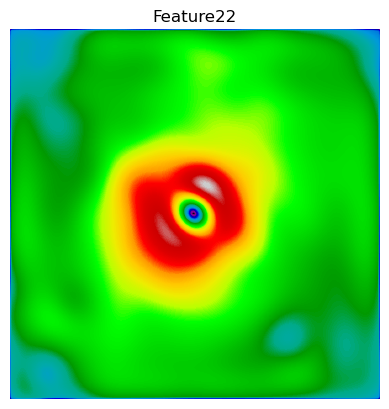

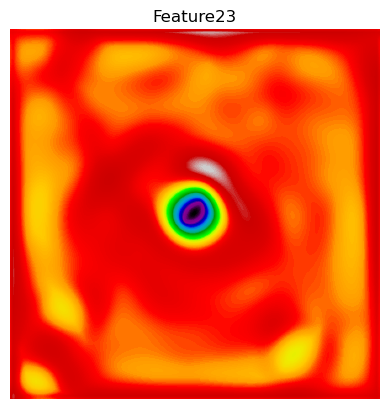

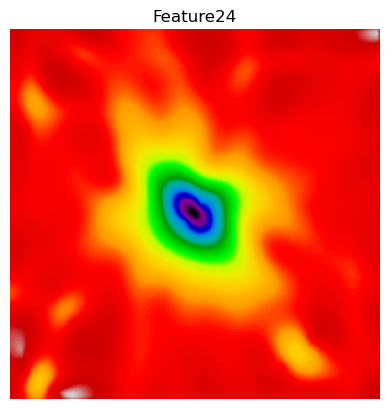

In [94]:
# Visualize each channel 
for i, image in enumerate(Pixels):
    plt.imshow(image, cmap='nipy_spectral', origin='lower')
    plt.title(f'Feature{i+1}')
    plt.axis('off')
    plt.show()